In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df=yf.download('RELIANCE.NS', start='2022-9-9', end='2023-9-9').reset_index(drop=False)
df = pd.DataFrame(df)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.to_csv('Reliance Stock Dataset.csv')

# **extracting necessary columns**

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
new_df = pd.DataFrame({"Date" :df["Date"],
          "Close" :df["Close"]})
new_df


,Date,Close
0,2022-09-09,2569.300049
1,2022-09-12,2598.050049
2,2022-09-13,2619.750000
3,2022-09-14,2588.350098
4,2022-09-15,2562.699951
...,...,...
244,2023-09-04,2410.699951
245,2023-09-05,2423.600098
246,2023-09-06,2428.699951
247,2023-09-07,2432.000000


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Close   249 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


# **Filling missing dates with close price of previous dates**

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Close   249 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [9]:
new_df.rename(columns = {"index":"Date"},inplace = True)
new_df.columns

Index(['Date', 'Close'], dtype='object')

In [10]:
new_df

,Date,Close
0,2022-09-09,2569.300049
1,2022-09-12,2598.050049
2,2022-09-13,2619.750000
3,2022-09-14,2588.350098
4,2022-09-15,2562.699951
...,...,...
244,2023-09-04,2410.699951
245,2023-09-05,2423.600098
246,2023-09-06,2428.699951
247,2023-09-07,2432.000000


In [11]:
new_df.head(10)

,Date,Close
0,2022-09-09,2569.300049
1,2022-09-12,2598.050049
2,2022-09-13,2619.750000
3,2022-09-14,2588.350098
4,2022-09-15,2562.699951
5,2022-09-16,2499.199951
6,2022-09-19,2502.449951
7,2022-09-20,2502.850098
8,2022-09-21,2509.750000
9,2022-09-22,2486.100098


In [12]:
new_df["Close"].unique

<bound method Series.unique of 0      2569.300049
1      2598.050049
2      2619.750000
3      2588.350098
4      2562.699951
          ...     
244    2410.699951
245    2423.600098
246    2428.699951
247    2432.000000
248    2448.199951
Name: Close, Length: 249, dtype: float64>

# AS we found that in close price column , is present so we need to delect , and then change the datatype to float

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Close   249 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [14]:
new_df.columns

Index(['Date', 'Close'], dtype='object')

# **Creating some new columns for visulisation**

In [15]:
new_df["Day"] = new_df["Date"].dt.strftime("%A")
new_df

,Date,Close,Day
0,2022-09-09,2569.300049,Friday
1,2022-09-12,2598.050049,Monday
2,2022-09-13,2619.750000,Tuesday
3,2022-09-14,2588.350098,Wednesday
4,2022-09-15,2562.699951,Thursday
...,...,...,...
244,2023-09-04,2410.699951,Monday
245,2023-09-05,2423.600098,Tuesday
246,2023-09-06,2428.699951,Wednesday
247,2023-09-07,2432.000000,Thursday


In [16]:
new_df.describe()

,Close
count,249.000000
mean,2479.780530
std,119.963826
min,2201.250000
25%,2385.399902
50%,2480.300049
75%,2555.149902
max,2841.850098


In [17]:
new_df.isna().sum()

Date     0
Close    0
Day      0
dtype: int64

<Axes: >

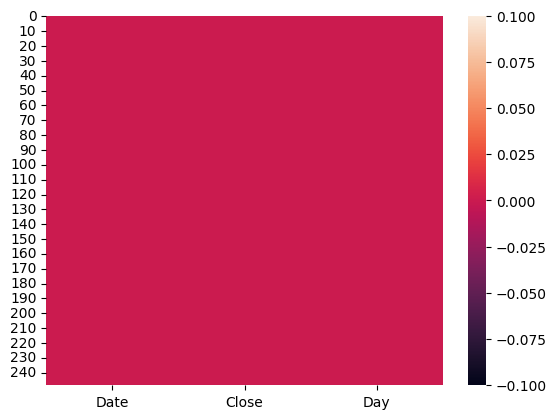

In [18]:
sns.heatmap(new_df.isna())

In [19]:
new_df.head()

,Date,Close,Day
0,2022-09-09,2569.300049,Friday
1,2022-09-12,2598.050049,Monday
2,2022-09-13,2619.750000,Tuesday
3,2022-09-14,2588.350098,Wednesday
4,2022-09-15,2562.699951,Thursday


# **Outlier Detection**

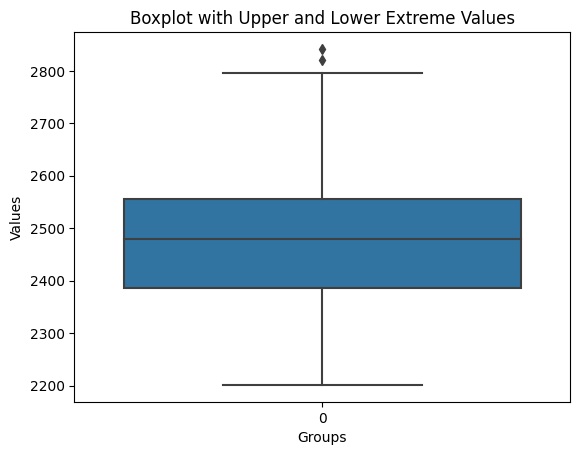

In [20]:
sns.boxplot(new_df["Close"])
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Boxplot with Upper and Lower Extreme Values')

# Show the plot
plt.show()

(array([ 9., 15., 39., 45., 51., 48., 26.,  5.,  8.,  3.]),
 array([2201.25      , 2265.31000977, 2329.37001953, 2393.4300293 ,
        2457.49003906, 2521.55004883, 2585.61005859, 2649.67006836,
        2713.73007813, 2777.79008789, 2841.85009766]),
 <BarContainer object of 10 artists>)

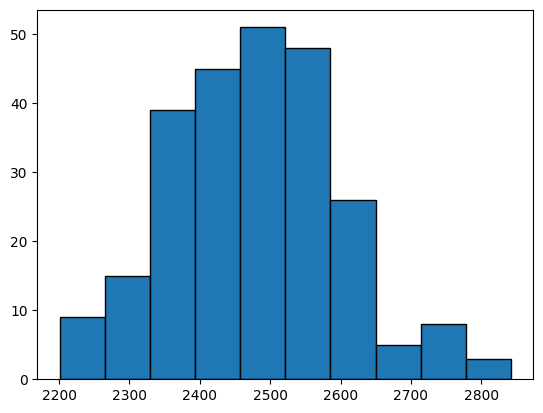

In [21]:
plt.hist(new_df["Close"], bins=10, edgecolor='black')


# **Data is normally distributed and most of the data points are lies between 2300 to 2600**

In [22]:
def outlier_detection(new_df,col):
# Calculate the upper and lower limits
  Q1 = new_df[col].quantile(0.25)
  Q3 = new_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  print("Lower Limit Is : ",lower)
  print("Upper Limit Is : ",upper)

  upper_array = np.where(new_df[col] > upper)
  lower_array = np.where(new_df[col] < lower)
  print("outlier datapoints in lower array : ",lower_array)
  print("outlier datapoints in upper array : ",upper_array)


In [23]:
outlier_detection(new_df,"Close")

Lower Limit Is :  2130.77490234375
Upper Limit Is :  2809.77490234375
outlier datapoints in lower array :  (array([], dtype=int64),)
outlier datapoints in upper array :  (array([211, 212]),)


In [24]:
#printing outlier data point
new_df[new_df["Close"] > 2807.175048828125]

,Date,Close,Day
211,2023-07-18,2820.449951,Tuesday
212,2023-07-19,2841.850098,Wednesday


we can't drop outlier data points in time series analysis because in time seies analysis sequence is important so we will replace this outlier data points with upper extreme (i.e. capping approch)

In [25]:
#replacing outlier data points
new_df.loc[new_df["Close"] > 2807.175048828125,"Close"] = 2807.175048828125

In [26]:
new_df.describe()

,Close
count,249.000000
mean,2479.587960
std,119.411567
min,2201.250000
25%,2385.399902
50%,2480.300049
75%,2555.149902
max,2807.175049


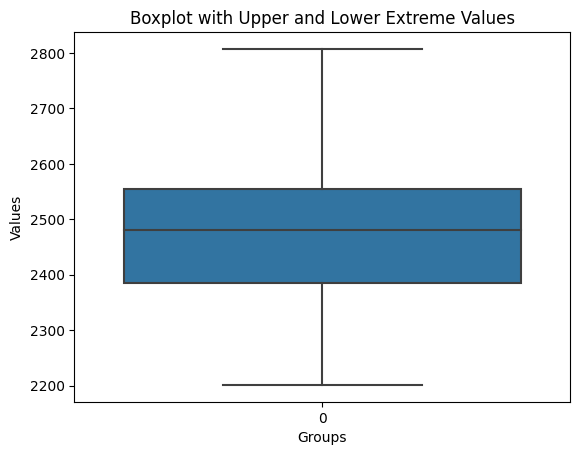

In [27]:
sns.boxplot(new_df["Close"])
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Boxplot with Upper and Lower Extreme Values')

# Show the plot
plt.show()

# **visualization**

# plotting graph of close price with date

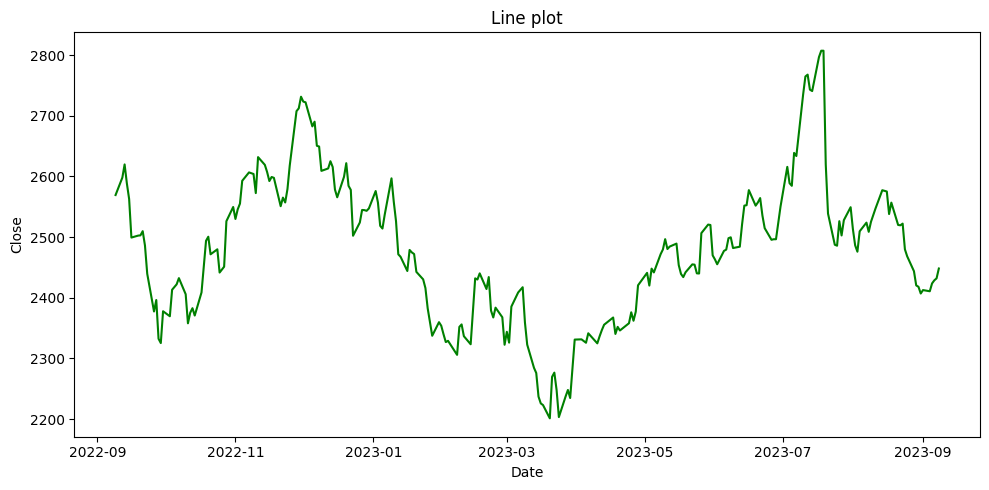

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,5))
sns.lineplot(x = new_df["Date"],y = new_df['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Line plot")
plt.tight_layout()

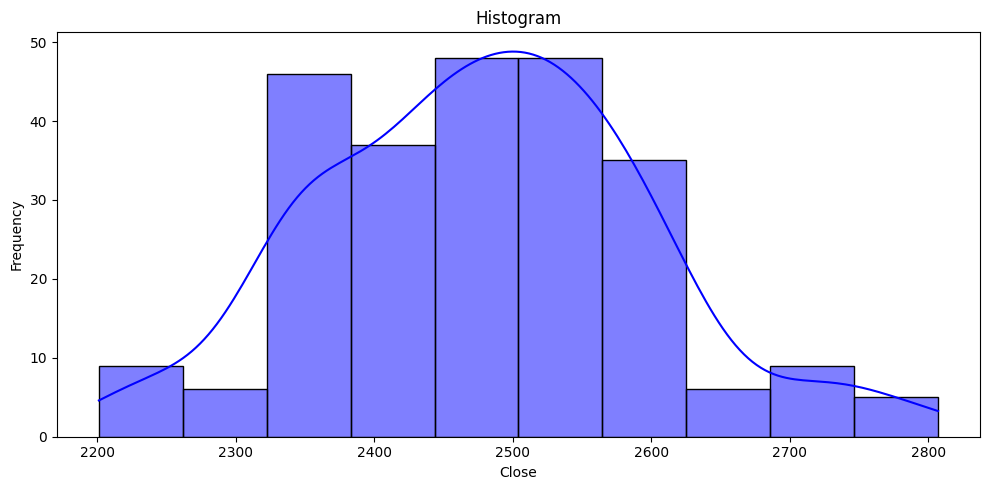

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(new_df["Close"], bins=10, kde=True, color='blue')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title("Histogram")
plt.tight_layout()

# **most of the datapoints having cloce price value between 2300 to 2600**

<Axes: xlabel='Close', ylabel='Density'>

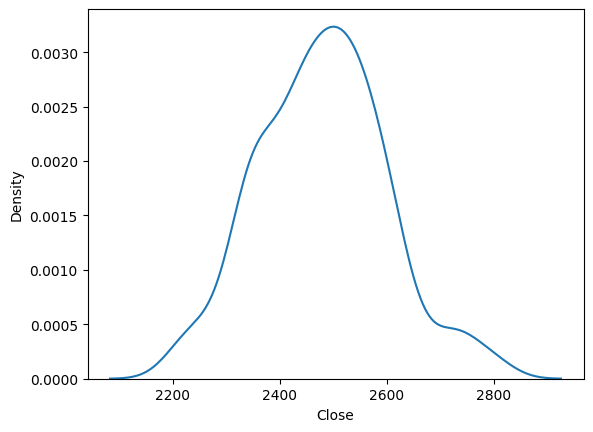

In [30]:
#kdeplot
sns.kdeplot(new_df["Close"])


<Axes: ylabel='Close'>

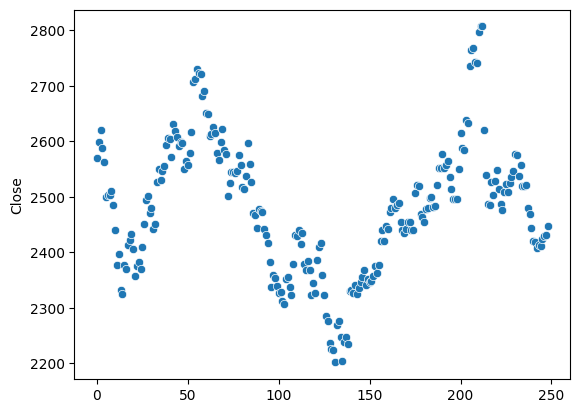

In [31]:
#ScatterPLOT
sns.scatterplot(new_df["Close"])


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

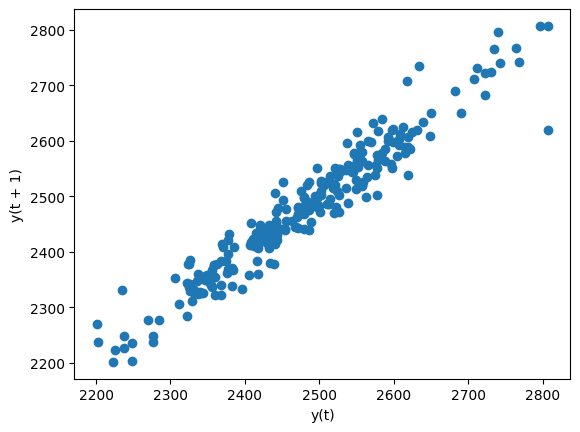

In [32]:
#lag plot
from pandas.plotting import lag_plot
lag_plot(new_df["Close"])


# upword relationship is there.

<Figure size 1500x500 with 0 Axes>

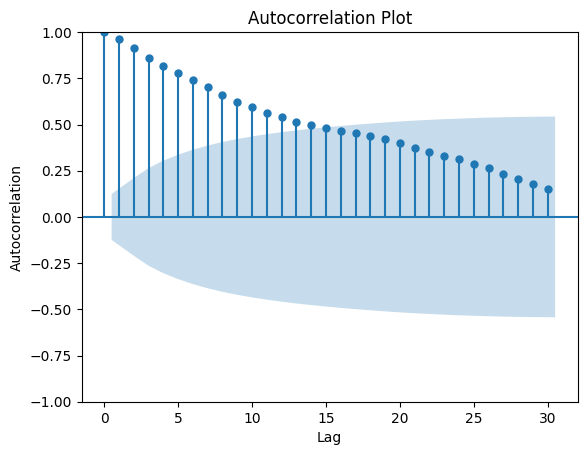

<Figure size 640x480 with 0 Axes>

In [33]:
#autocorrelation plot
plt.figure(figsize=(15,5))
plot_acf(new_df["Close"], lags=30)  # Adjust the number of lags as needed
plt.title("Autocorrelation Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

plt.show()
plt.tight_layout()

# **identify trend components and seasonal components**

<Axes: xlabel='Date', ylabel='Close'>

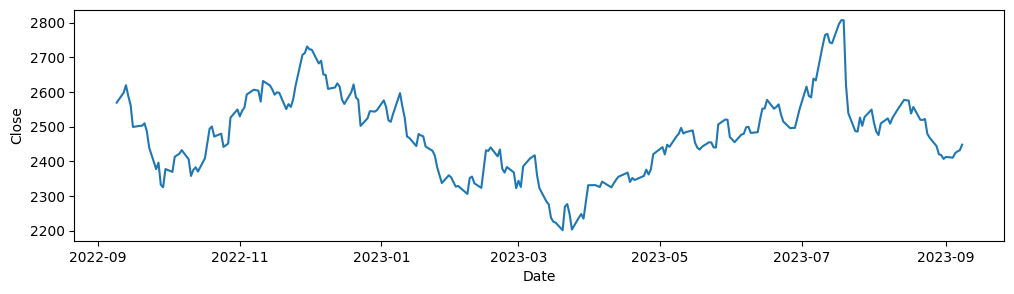

In [34]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Date",y="Close",data=new_df)

In [35]:
#we will plot linear model and compairing root mean square error

In [36]:
new_df

,Date,Close,Day
0,2022-09-09,2569.300049,Friday
1,2022-09-12,2598.050049,Monday
2,2022-09-13,2619.750000,Tuesday
3,2022-09-14,2588.350098,Wednesday
4,2022-09-15,2562.699951,Thursday
...,...,...,...
244,2023-09-04,2410.699951,Monday
245,2023-09-05,2423.600098,Tuesday
246,2023-09-06,2428.699951,Wednesday
247,2023-09-07,2432.000000,Thursday


In [37]:
#creating some new columns
new_df["t"] = range(1,len(new_df)+1)

new_df["log_Close_Price"] = np.log(new_df["Close"])

new_df["t_square"] = new_df["t"] ** 2

new_df = pd.get_dummies(data=new_df,columns=['Day'])

#year
new_df["year"] = new_df['Date'].dt.strftime("%Y") # year extraction



In [38]:
new_df

,Date,Close,t,log_Close_Price,t_square,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,year
0,2022-09-09,2569.300049,1,7.851389,1,1,0,0,0,0,2022
1,2022-09-12,2598.050049,2,7.862516,4,0,1,0,0,0,2022
2,2022-09-13,2619.750000,3,7.870834,9,0,0,0,1,0,2022
3,2022-09-14,2588.350098,4,7.858776,16,0,0,0,0,1,2022
4,2022-09-15,2562.699951,5,7.848817,25,0,0,1,0,0,2022
...,...,...,...,...,...,...,...,...,...,...,...
244,2023-09-04,2410.699951,245,7.787672,60025,0,1,0,0,0,2023
245,2023-09-05,2423.600098,246,7.793009,60516,0,0,0,1,0,2023
246,2023-09-06,2428.699951,247,7.795111,61009,0,0,0,0,1,2023
247,2023-09-07,2432.000000,248,7.796469,61504,0,0,1,0,0,2023


# **Forcasing Different Method**



# Splitting the data

In [39]:
Train = new_df.head(315)
Test = new_df.tail(50)

In [40]:
Train

,Date,Close,t,log_Close_Price,t_square,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,year
0,2022-09-09,2569.300049,1,7.851389,1,1,0,0,0,0,2022
1,2022-09-12,2598.050049,2,7.862516,4,0,1,0,0,0,2022
2,2022-09-13,2619.750000,3,7.870834,9,0,0,0,1,0,2022
3,2022-09-14,2588.350098,4,7.858776,16,0,0,0,0,1,2022
4,2022-09-15,2562.699951,5,7.848817,25,0,0,1,0,0,2022
...,...,...,...,...,...,...,...,...,...,...,...
244,2023-09-04,2410.699951,245,7.787672,60025,0,1,0,0,0,2023
245,2023-09-05,2423.600098,246,7.793009,60516,0,0,0,1,0,2023
246,2023-09-06,2428.699951,247,7.795111,61009,0,0,0,0,1,2023
247,2023-09-07,2432.000000,248,7.796469,61504,0,0,1,0,0,2023


In [41]:
Test

,Date,Close,t,log_Close_Price,t_square,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,year
199,2023-06-30,2550.250000,200,7.843947,40000,1,0,0,0,0,2023
200,2023-07-03,2615.699951,201,7.869287,40401,0,1,0,0,0,2023
201,2023-07-04,2588.750000,202,7.858930,40804,0,0,0,1,0,2023
202,2023-07-05,2584.500000,203,7.857287,41209,0,0,0,0,1,2023
203,2023-07-06,2638.750000,204,7.878061,41616,0,0,1,0,0,2023
204,2023-07-07,2633.600098,205,7.876107,42025,1,0,0,0,0,2023
205,2023-07-10,2735.050049,206,7.913905,42436,0,1,0,0,0,2023
206,2023-07-11,2764.699951,207,7.924687,42849,0,0,0,1,0,2023
207,2023-07-12,2767.750000,208,7.925790,43264,0,0,0,0,1,2023
208,2023-07-13,2743.000000,209,7.916807,43681,0,0,1,0,0,2023


# **1.Linear Model**

In [42]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model = smf.ols('Close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Close'], pred_linear))
rmse_linear #root mean square error


133.35197332147644

#**2.Exponential Model**

In [43]:
Exp = smf.ols('log_Close_Price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['log_Close_Price'], pred_Exp))
rmse_Exp #Exponential root mean square error


0.0519428277569876

# **3.Quadratic model**

In [44]:
Quad = smf.ols('Close~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Close'],pred_Quad))
rmse_Quad #Exponential root mean square error


134.3042230350319

# **4.Additive Seasonality**

In [45]:
# Fit the model with categorical day variables
add_sea = smf.ols('Close ~ Day_Monday + Day_Tuesday + Day_Wednesday + Day_Thursday + Day_Friday', data=Train).fit()

# Generate predictions using the test data
pred_add_sea = add_sea.predict(Test)

# Calculate RMSE
rmse_add_sea = np.sqrt(mean_squared_error(Test['Close'], pred_add_sea))
rmse_add_sea #Additive seasonality root mean square error


133.35104598790167

# **5.Multiplicative Seasonality**

In [46]:
Mul_Add_sea = smf.ols('log_Close_Price ~ Day_Monday + Day_Tuesday + Day_Wednesday + Day_Thursday + Day_Friday',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['log_Close_Price'], pred_Mult_add_sea))
rmse_Mult_add_sea #Multiplicative seasonality root mean square error


0.05194821033116044

# **6.Additive Seasonality Quadratic**



In [47]:
add_sea_Quad = smf.ols('Close ~ t + t_square +  Day_Monday + Day_Tuesday + Day_Wednesday + Day_Thursday + Day_Friday',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Close'], pred_add_sea_quad))
rmse_add_sea_quad #Additive seasonality root mean square error with quadratic train


134.05774632996747

# **Comapiring the result**

In [48]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
1,rmse_Exp,0.051943
5,rmse_Mult_sea,0.051948
3,rmse_add_sea,133.351046
0,rmse_linear,133.351973
4,rmse_add_sea_quad,134.057746
2,rmse_Quad,134.304223


<Axes: xlabel='Date', ylabel='Close'>

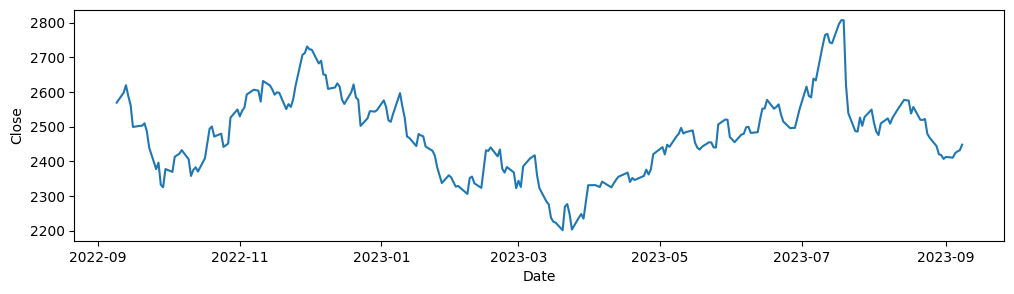

In [49]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Date",y="Close",data=new_df)

# **Conclusion : exponential trend with Multiplicative Seasonality**

# **Moving Average**

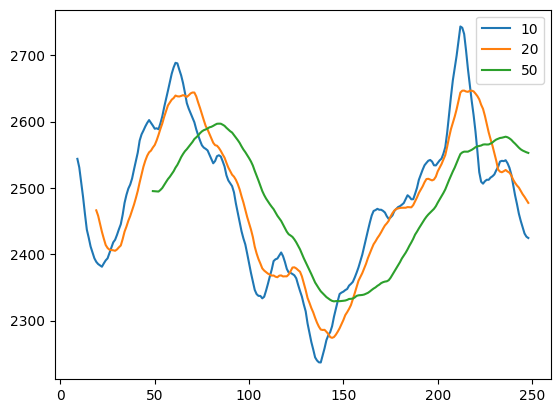

In [50]:
new_df['Close'].rolling(10).mean().plot(label = '10')
new_df['Close'].rolling(20).mean().plot(label = '20')
new_df['Close'].rolling(50).mean().plot(label = '50')
plt.legend()

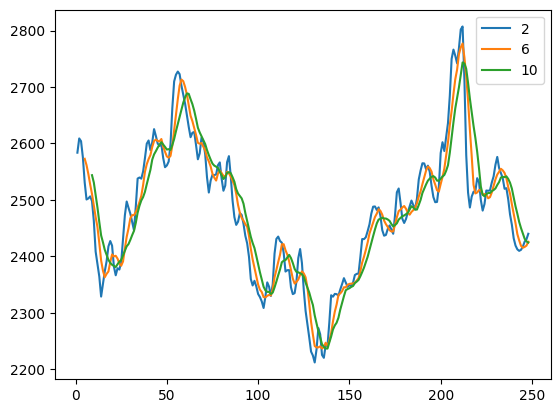

In [51]:
for i in range(2,12,4):
    new_df['Close'].rolling(i).mean().plot(label = str(i))
    plt.legend()


# **Model Building**

# **ARIMA**

In [52]:
!pip install pmdarima

In [53]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [54]:
adfuller(new_df['Close'])[1]

0.0905749005090371

### ***ARIMA Model***

In [55]:
order = auto_arima(new_df['Close'],trace=True,suppress_warnings=True)
order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2431.798, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3091.352, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2434.807, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2831.391, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4601.498, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2429.802, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2673.252, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2429.602, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2430.485, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2428.552, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2430.299, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2432.209, Time=1.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 5.967 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [56]:
new_df.shape

(249, 11)

In [57]:
#Split the data
train = new_df.head(315)
test= new_df.tail(50)

In [58]:
train.shape

(249, 11)

In [59]:
test.shape

(50, 11)

In [60]:
model = ARIMA(train['Close'], order=(1, 1, 0)).fit()

### ***Evaluating the model***

In [61]:
test

,Date,Close,t,log_Close_Price,t_square,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,year
199,2023-06-30,2550.250000,200,7.843947,40000,1,0,0,0,0,2023
200,2023-07-03,2615.699951,201,7.869287,40401,0,1,0,0,0,2023
201,2023-07-04,2588.750000,202,7.858930,40804,0,0,0,1,0,2023
202,2023-07-05,2584.500000,203,7.857287,41209,0,0,0,0,1,2023
203,2023-07-06,2638.750000,204,7.878061,41616,0,0,1,0,0,2023
204,2023-07-07,2633.600098,205,7.876107,42025,1,0,0,0,0,2023
205,2023-07-10,2735.050049,206,7.913905,42436,0,1,0,0,0,2023
206,2023-07-11,2764.699951,207,7.924687,42849,0,0,0,1,0,2023
207,2023-07-12,2767.750000,208,7.925790,43264,0,0,0,0,1,2023
208,2023-07-13,2743.000000,209,7.916807,43681,0,0,1,0,0,2023


In [62]:
ypred = model.predict(start =315, end = 364)
ypred

315    2451.275234
316    2451.275234
317    2451.275234
318    2451.275234
319    2451.275234
320    2451.275234
321    2451.275234
322    2451.275234
323    2451.275234
324    2451.275234
325    2451.275234
326    2451.275234
327    2451.275234
328    2451.275234
329    2451.275234
330    2451.275234
331    2451.275234
332    2451.275234
333    2451.275234
334    2451.275234
335    2451.275234
336    2451.275234
337    2451.275234
338    2451.275234
339    2451.275234
340    2451.275234
341    2451.275234
342    2451.275234
343    2451.275234
344    2451.275234
345    2451.275234
346    2451.275234
347    2451.275234
348    2451.275234
349    2451.275234
350    2451.275234
351    2451.275234
352    2451.275234
353    2451.275234
354    2451.275234
355    2451.275234
356    2451.275234
357    2451.275234
358    2451.275234
359    2451.275234
360    2451.275234
361    2451.275234
362    2451.275234
363    2451.275234
364    2451.275234
Name: predicted_mean, dtype: float64

In [63]:
print(np.sqrt(mean_squared_error(test['Close'], ypred)))

150.8889481367377


# **Value is not nearer to 0 so model is not good for our data**

# **Normalizing The Data**

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [65]:
new_df

,Date,Close,t,log_Close_Price,t_square,Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,year
0,2022-09-09,2569.300049,1,7.851389,1,1,0,0,0,0,2022
1,2022-09-12,2598.050049,2,7.862516,4,0,1,0,0,0,2022
2,2022-09-13,2619.750000,3,7.870834,9,0,0,0,1,0,2022
3,2022-09-14,2588.350098,4,7.858776,16,0,0,0,0,1,2022
4,2022-09-15,2562.699951,5,7.848817,25,0,0,1,0,0,2022
...,...,...,...,...,...,...,...,...,...,...,...
244,2023-09-04,2410.699951,245,7.787672,60025,0,1,0,0,0,2023
245,2023-09-05,2423.600098,246,7.793009,60516,0,0,0,1,0,2023
246,2023-09-06,2428.699951,247,7.795111,61009,0,0,0,0,1,2023
247,2023-09-07,2432.000000,248,7.796469,61504,0,0,1,0,0,2023


In [66]:
# Setting the date column as index
close_df = pd.DataFrame({"Date" :new_df["Date"],
          "Close" :new_df["Close"]})
close_df

,Date,Close
0,2022-09-09,2569.300049
1,2022-09-12,2598.050049
2,2022-09-13,2619.750000
3,2022-09-14,2588.350098
4,2022-09-15,2562.699951
...,...,...
244,2023-09-04,2410.699951
245,2023-09-05,2423.600098
246,2023-09-06,2428.699951
247,2023-09-07,2432.000000


In [67]:
close_df = close_df.set_index('Date')
close_df

,Close
Date,
2022-09-09,2569.300049
2022-09-12,2598.050049
2022-09-13,2619.750000
2022-09-14,2588.350098
2022-09-15,2562.699951
...,...
2023-09-04,2410.699951
2023-09-05,2423.600098
2023-09-06,2428.699951


In [68]:
print(close_df.shape)

(249, 1)


In [69]:
close_df=close_df.reset_index()

In [70]:
close_df['Date']

0     2022-09-09
1     2022-09-12
2     2022-09-13
3     2022-09-14
4     2022-09-15
         ...    
244   2023-09-04
245   2023-09-05
246   2023-09-06
247   2023-09-07
248   2023-09-08
Name: Date, Length: 249, dtype: datetime64[ns]

# **Normalizing / scaling close value between 0 to 1**

In [71]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(249, 1)


In [72]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (214, 1)
test_data:  (35, 1)


# **Create new dataset according to requirement of time-series prediction**

In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [74]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (198, 15)
y_train:  (198,)
X_test:  (19, 15)
y_test (19,)


# **Algorithms**

# **Support vector regression - SVR**

In [75]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [76]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (198, 1)
Test data prediction: (19, 1)


In [77]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

# **Evaluation metrices RMSE, MSE and MAE**

In [78]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  33.138423844234644
Train data MSE:  1098.1551348801393
Test data MAE:  26.885785035251327
-------------------------------------------------------------------------------------
Test data RMSE:  26.41664287669748
Test data MSE:  697.8390208749718
Test data MAE:  19.331998258670243


# **Explained variance regression score**

In [79]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9412389333611493
Test data explained variance regression score: 0.8714405841193167


# **R2 score for regression**

In [80]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9339738789264438
Test data R2 score: 0.8073565179809212


# **Comparision between original stock close price vs predicted close price**

In [81]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


# **Predicting next 30 days**

In [82]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# **Plotting last 15 days and next predicted 30 days**

In [83]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [84]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting whole closing stock price with prediction**

In [85]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Random Forest Regressor - RF**

In [86]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [87]:
# Lets Do the prediction

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (198, 1)
Test data prediction: (19, 1)


In [88]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

# **Evaluation metrices RMSE, MSE and MAE**

In [89]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  12.9998251623663
Train data MSE:  168.995454252092
Test data MAE:  9.886978414516275
-------------------------------------------------------------------------------------
Test data RMSE:  25.016328205964317
Test data MSE:  625.8166769085259
Test data MAE:  21.38747057462998


# **Explained variance regression score**

In [90]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.989840319784423
Test data explained variance regression score: 0.8275605110148111


**R2 score for regression**

In [91]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9898392185503488
Test data R2 score: 0.8272388041670325


# **Comparision between original stock close price vs predicted close price**

In [92]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


# **Predicting next 30 days**

In [93]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# **Plotting last 15 days and next predicted 30 days**

In [94]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [95]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting whole closing stock price with prediction**

In [96]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **K-nearest neighgbour - KNN**

In [97]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [98]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (198, 1)
Test data prediction: (19, 1)


In [99]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

# **Evaluation metrices RMSE, MSE and MAE**

In [100]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  45.322577275240775
Train data MSE:  2054.1360108701715
Test data MAE:  36.24083543771044
-------------------------------------------------------------------------------------
Test data RMSE:  31.551025113593273
Test data MSE:  995.4671857185933
Test data MAE:  25.364202131304793


# **Explained variance regression score**

In [101]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8766175713521263
Test data explained variance regression score: 0.7690381920594749


# **R2 score for regression**

In [102]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.8764959260787238
Test data R2 score: 0.7251941219163762


# **Comparision between original stock close price vs predicted close price**

In [103]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


# **Predicting next 30 days**

In [104]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# **Plotting last 15 days and next predicted 30 days**

In [105]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [106]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting whole closing stock price with prediction**

In [107]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **LSTM**

In [108]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (198, 15, 1)
X_test:  (19, 15, 1)


# **LSTM(Long Short Term Memory) model structure**

In [109]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 23s 1s/step - loss: 0.1974 - val_loss: 0.0482
Epoch 2/100
7/7 [==============================] - 0s 59ms/step - loss: 0.0464 - val_loss: 0.0599
Epoch 3/100
7/7 [==============================] - 0s 58ms/step - loss: 0.0352 - val_loss: 0.0127
Epoch 4/100
7/7 [==============================] - 0s 73ms/step - loss: 0.0233 - val_loss: 0.0100
Epoch 5/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0221 - val_loss: 0.0172
Epoch 6/100
7/7 [==============================] - 0s 54ms/step - loss: 0.0206 - val_loss: 0.0153
Epoch 7/100
7/7 [==============================] - 0s 53ms/step - loss: 0.0195 - val_loss: 0.0149
Epoch 8/100
7/7 [==============================] - 0s 49ms/step - loss: 0.0186 - val_loss: 0.0148
Epoch 9/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0181 - val_loss: 0.0138
Epoch 10/100
7/7 [==============================] - 0s 57ms/step - loss: 0.0178 - val_loss: 0.0201
Epoch 11/100
7/7 [==

In [112]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

1/1 [==============================] - 0s 28ms/step


((198, 1), (19, 1))

In [113]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

# **Evaluation metrices RMSE, MSE and MAE**

In [114]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  47.27978977763892
Train data MSE:  2235.3785214177296
Test data MAE:  37.36618627683081
-------------------------------------------------------------------------------------
Test data RMSE:  29.075451285775365
Test data MSE:  845.3818674714963
Test data MAE:  24.236199629934234


# **Explained variance regression score**

In [115]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8901490111155167
Test data explained variance regression score: 0.8022156597464928


# **R2 score for regression**

In [116]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.8655987954593833
Test data R2 score: 0.7666262537435854


# **Comparision between original stock close price vs predicted close price**

In [117]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


# **Predicting next 30 days**

In [118]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# **Plotting last 15 days and next predicted 30 days**

In [119]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [120]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting whole closing stock price with prediction**

In [121]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Model Evaluation**

In [122]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
})
finaldf

,svr,rf,knn,lstm
0,2569.300049,2569.300049,2569.300049,2569.300049
1,2598.050049,2598.050049,2598.050049,2598.050049
2,2619.750000,2619.750000,2619.750000,2619.750000
3,2588.350098,2588.350098,2588.350098,2588.350098
4,2562.699951,2562.699951,2562.699951,2562.699951
...,...,...,...,...
274,3003.231637,2463.780513,2480.526660,2334.950524
275,3009.618275,2463.874011,2484.350000,2334.092860
276,3008.448991,2463.335510,2493.686670,2333.364736
277,2998.200194,2463.074512,2494.679997,2332.751297


# **Conclusion Chart**

In [123]:
names = cycle(['SVR', 'RF','KNN','LSTM'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [124]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.933974,0.807357
1,Random Forest,0.989839,0.827239
2,KNN,0.876496,0.725194
3,LSTM,0.865599,0.766626


**We final our LSTM model**

In [125]:
model.save('your_lstm_model')

In [126]:
!zip -r /content/your_lstm_model.zip /content/your_lstm_model

  adding: content/your_lstm_model/ (stored 0%)
  adding: content/your_lstm_model/saved_model.pb (deflated 91%)
  adding: content/your_lstm_model/assets/ (stored 0%)
  adding: content/your_lstm_model/keras_metadata.pb (deflated 91%)
  adding: content/your_lstm_model/fingerprint.pb (stored 0%)
  adding: content/your_lstm_model/variables/ (stored 0%)
  adding: content/your_lstm_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/your_lstm_model/variables/variables.index (deflated 65%)
